# UMAP method

In [95]:
# Load packages

import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Algorithm
# Algorithm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from functools import partial


import seaborn as sns
import umap

## Load Data

In [96]:
data = np.load('./data/regression_data.npy')
target = np.loadtxt('./data/target_values.txt')
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 100, random_state = 7)

In [97]:
data = np.array(np.vstack([X_train, X_test]), dtype=np.float64) 
target = np.hstack([Y_train, Y_test])

## Without target (Unsupervised)

In [98]:
def umap_unsupervised_and_plt(n_neighbors=3):
    #%%time
    embedding = umap.UMAP(n_neighbors=n_neighbors).fit_transform(data)
    fig, ax = plt.subplots(1, figsize=(14, 10))
    plt.scatter(*embedding.T, s=50, c=target, cmap='Spectral', alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    #cbar.set_ticklabels(classes)
    plt.title('Fashion MNIST Embedded via UMAP');

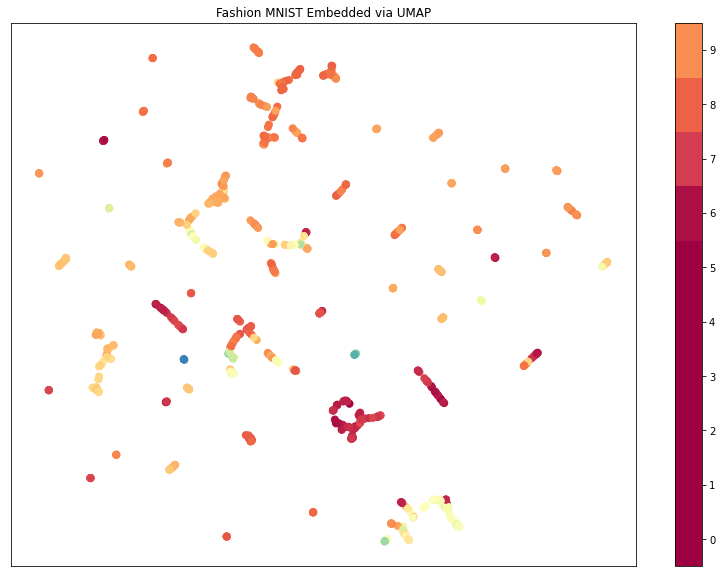

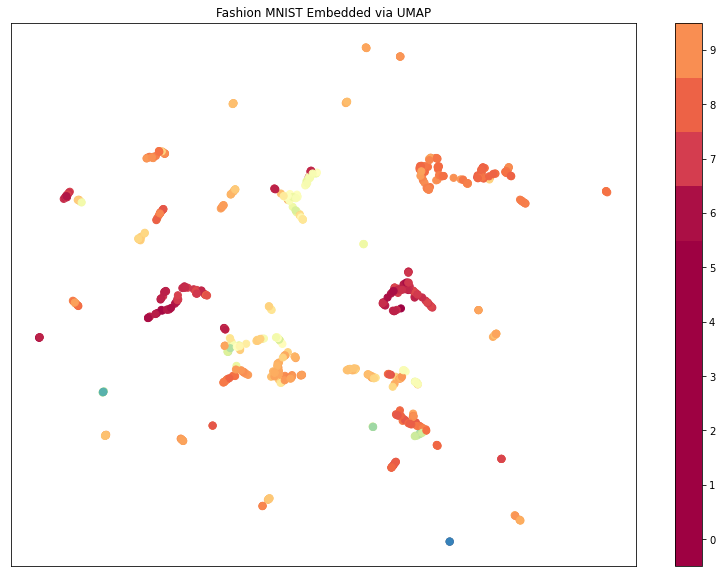

In [99]:
for i in range(3,5):
    umap_unsupervised_and_plt(n_neighbors=i)

## With target (Supervised)

In [170]:
%%time
mapper = umap.UMAP(n_neighbors=20,min_dist=0.4).fit(X_train, np.array(Y_train))

CPU times: user 9.98 s, sys: 144 ms, total: 10.1 s
Wall time: 6.86 s


In [171]:
%%time
test_embedding = mapper.transform(X_test)

CPU times: user 2.99 s, sys: 16 ms, total: 3 s
Wall time: 2.92 s


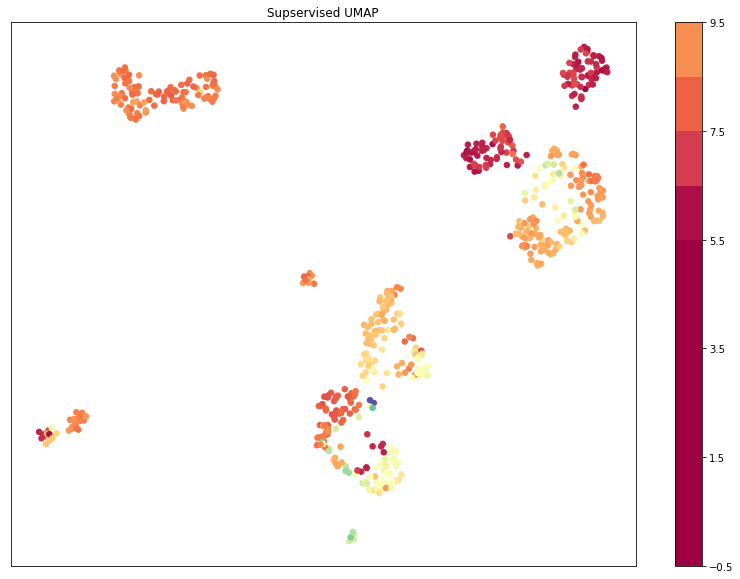

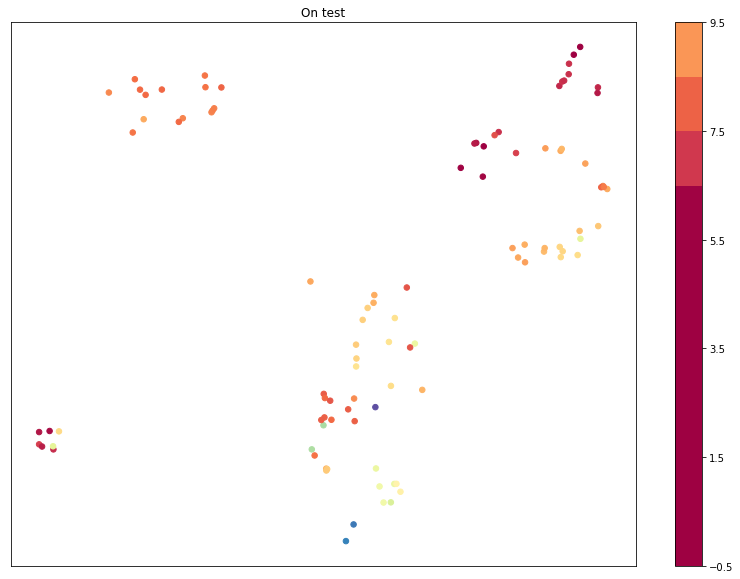

In [172]:
#Plot training sample
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mapper.embedding_.T, s=30, c=Y_train, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
#cbar.set_ticks(np.arangege(10))
#cbar.set_ticklabels(classes)
plt.title('Supservised UMAP');
#Plot test samples
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*test_embedding.T, s=30, c=Y_test, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
#cbar.set_ticks(np.arange(10))
#cbar.set_ticklabels(classes)
plt.title('On test');

## 3 Components UMAP

In [173]:
%%time
mapper = umap.UMAP(n_neighbors=20,min_dist=0.5,n_components=3).fit(X_train, np.array(Y_train))

CPU times: user 10.2 s, sys: 108 ms, total: 10.3 s
Wall time: 6.9 s


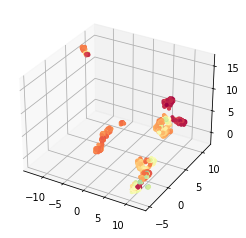

In [174]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u = mapper.embedding_
ax.scatter(u[:,0],u[:,1],u[:,2], c=Y_train,s=10,cmap='Spectral', alpha=1.0)
plt.show()

# Do regerssion with reducted features

In [189]:
%%time
mapper = umap.UMAP(n_neighbors=10,min_dist=0.5,n_components=30).fit(X_train, np.array(Y_train))
if False:
    fig, ax = plt.subplots(1, figsize=(14, 10))
    plt.scatter(*mapper.embedding_.T, s=30, c=Y_train, cmap='Spectral', alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
    #cbar.set_ticks(np.arangege(10))
    #cbar.set_ticklabels(classes)
    plt.title('Supservised UMAP');

CPU times: user 9.91 s, sys: 152 ms, total: 10.1 s
Wall time: 6.66 s


In [190]:
X_train_lowD = mapper.transform(X_train)
X_test_lowD = mapper.transform(X_test)

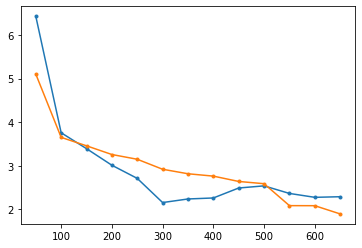

In [191]:
kernel_params = {"kernel": "rbf", "gamma": 1.0}
alpha = 1e-6
#krr = KernelRidge(alpha = alpha, **kernel_params)
#rr = Ridge(alpha= alpha)
numbers_train = np.arange(50,654,50)
losses = np.zeros((1,len(numbers_train)))
krr = KernelRidge(alpha = alpha, **kernel_params)
RMSE = partial(mean_squared_error, squared=False)

losses = np.zeros(len(numbers_train))
for j,n in enumerate(numbers_train):
    T_train = X_train_lowD[:n]
    Yt_train = Y_train[:n]
    T_test = X_test_lowD
    krr.fit(T_train,Yt_train)
    Y_pred_pca = krr.predict(T_test)
    #Y_test = Y_test.numpy()[0]
    losses[j] = RMSE(Y_test, Y_pred_pca)
plt.plot(numbers_train,losses,'.-',label='With UMAP')
# Train on full data set
losses = np.zeros(len(numbers_train))
for j,n in enumerate(numbers_train):
    T_train = X_train[:n]
    Yt_train = Y_train[:n]
    T_test = X_test
    krr.fit(T_train,Yt_train)
    Y_pred_pca = krr.predict(T_test)
    #Y_test = Y_test.numpy()[0]
    losses[j] = RMSE(Y_test, Y_pred_pca)
plt.plot(numbers_train,losses,'.-',label='Withuot UMAP')